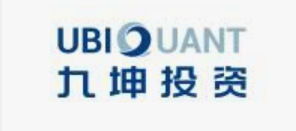

# Exploratory Data Analysis of the Features

@marketneutral

This is my second Ubiquant competition notebook. Please also see my other three notebooks.

- ["Ubiquant Target EDA PCA Magic"](https://www.kaggle.com/marketneutral/ubiquant-target-eda-pca-magic)
- ["Stacking & Feature Importance"](https://www.kaggle.com/marketneutral/stacking-feature-importance)
- ["Robust Multi-Target Pytorch"](https://www.kaggle.com/marketneutral/robust-multi-target-pytorch)


# Updated!

Version Notes

1. Version 4 released Feb 8, 2022
2. Version 6 released Feb 9, 2022
    - added feature to target corr and rolling IC

<div class="alert alert-warning">
<b>TL;DR:</b> The features are anonymous but represent "alphas": a vector of dimensionless numbers which should be directly proportionate to the forward return target. Although the features are anonymous, we <b>can</b> uncover some details. Mainly we can determined the "speed" of the alpha: how quickly it turns over aross time. 
</div>

In [1]:
import warnings
#warnings.filterwarnings("ignore")

In this code block, we import the Python warnings module, which provides a way to handle warning messages during code execution. In the second line, the "#" symbol indicates that the line is commented out, meaning it is not currently active.

The code would then call the "filterwarnings()" function of the warnings module with the argument "ignore" if the second line were uncommented. With the "ignore" argument, the program ignores all warnings during execution, modifying the behavior of warning messages.

By uncommenting the second line and calling the "filterwarnings()" function with the "ignore" argument, the code imports the warnings module and ignores any warnings that may arise during program execution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing

from scipy.stats import spearmanr

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 5)

N_CPU = multiprocessing.cpu_count()

The code block imports several Python modules commonly used in data analysis and visualization.

This line imports the numpy module, which provides support for mathematical operations and arrays in Python, and aliases it as "np". A second line imports the "pandas" module, which is used for data manipulation and analysis. To visualize and plot data, the third and fourth lines import "matplotlib.pyplot" and "seaborn".

Python code can run in parallel across multiple cores or CPUs with the "multiprocessing" module imported in the sixth line. Computing-intensive tasks can be sped up using this technique.

For calculating the Spearman rank correlation coefficient between two variables, the eighth line imports the "spearmanr" function from the "scipy.stats" module.

In the following two lines, we define some default matplotlib plot styles and sizes.

The last line assigns the number of CPUs available in the system to the variable "N_CPU", which determines the number of processes to initiate in parallel processing tasks.

A number of useful Python modules are imported for data analysis and visualization, a default plot style is set, and a variable for parallel processing tasks is assigned. Data analysis and visualization tasks are not performed by the code, but the environment and dependencies are set up.

# Load and Inspect the Data

Thanks [Rob Mulla](https://www.kaggle.com/robikscube) for the reduced memory version of the data.

In [3]:
%%time
train = (pd.read_parquet('../input/ubiquant-parquet/train_low_mem.parquet')
         .sort_values(['investment_id', 'time_id']));

CPU times: user 20.6 s, sys: 18 s, total: 38.6 s
Wall time: 43.6 s


This code begins with the magic command %%time, which measures the execution time of code cells in Jupyter notebooks.

A Pandas DataFrame named train is created by reading in a Parquet file located in the directory ../input/ubiquant-parquet/. Pandas provides the read_parquet() function for reading Parquet files, which is a fast and efficient way to read large datasets.

Pandas' sort_values() function sorts the DataFrame in ascending order first by the investment_id column, then by the time_id column. DataFrames sorted by time are useful for many time-series analyses.

A sorted DataFrame is then assigned to the variable train. At the end of the line, a semicolon suppresses the output of the operation's results.

Thanks to the %%time magic command at the beginning of the code cell, the execution time of the code cell will be displayed below the output.

Let's take a peak and see what the data looks like.

In [4]:
train.head()

row_id  time_id  investment_id    target       f_0       f_1  f_2  \
1711316  757_0      757              0  0.066664  1.188115  4.222316  0.0   
1714085  758_0      758              0  2.788548  1.124336  4.151623  0.0   
1716869  759_0      759              0 -3.844462  1.112007  3.846268  0.0   
1719651  760_0      760              0 -3.304178  1.138571  3.549768  0.0   
1722426  761_0      761              0 -3.440455  0.988404  2.754384  0.0   

              f_3       f_4       f_5  ...     f_290     f_291     f_292  \
1711316  7.042030  1.006562 -0.106670  ... -2.039460  0.449313 -1.306017   
1714085  6.618785  0.981486 -1.685877  ... -1.807204  0.582957 -0.896639   
1716869  6.281942  0.948479 -1.814978  ... -0.985501  1.045337  0.213021   
1719651  6.268737  1.047803 -2.124201  ... -1.522761  0.728089  3.173257   
1722426  5.847007  0.919070 -2.143898  ...  0.750976 -0.840846  3.079106   

            f_293     f_294     f_295     f_296     f_297  f_298     f_299  
1711316  0.102117  0.860582  9.245561  1.119834  1.128593    0.0 -0.733478  
1714085  0.115408  0.916387  4.294172  1.236234  0.424175    0.0 -0.736736  
1716869  0.198558 -1.068690  1.208212 -0.910962  0.169104    0.0 -0.730020  
1719651  0.149934  0.657624  1.237572  0.026174  0.678217    0.0 -0.706821  
1722426  0.127343  1.262858  2.195298 -0.100932 -1.098608    0.0 -0.747978  

[5 rows x 304 columns]

A Pandas DataFrame train is displayed using the train.head() method call. Pandas DataFrame objects provide the head() method, which returns the first n rows by default, where n is 5. In train.head(), the user is able to inspect the structure and contents of the DataFrame quickly, ensuring that the data was loaded and sorted correctly in the previous steps, and getting a feel for its range of values and data types. If you pass an integer argument to head(), it will display the first five rows of the DataFrame. DataFrame's first 10 rows would be returned by train.head(10), for example.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141410 entries, 1711316 to 3141409
Columns: 304 entries, row_id to f_299
dtypes: float32(301), object(1), uint16(2)
memory usage: 3.6+ GB


Train.info() displays the summary information about the Pandas DataFrame train using a method call. A Pandas DataFrame object's info() method prints a concise summary of the DataFrame, including the number of rows and columns, the column names, and the number of non-null values.

Train.info() is useful for identifying any missing values or inconsistent data by quickly understanding the structure of the DataFrame. Train.info() returns the name and data type of each column, along with the number of non-null values in each column and the memory usage. When working with large datasets, the output also shows the total memory usage of the DataFrame, which can be useful for optimizing memory usage.

Train.info() provides an overview of the structure and properties of a Pandas DataFrame quickly and easily.

In [6]:
train.isnull().sum().sum()

0

Train.isnull().sum().sum() counts the total number of missing values in Pandas DataFrames.

The first method called isnull() returns a DataFrame with the same shape as the original train DataFrame but with True values where the original DataFrame contains missing (null) values and False values otherwise. As a second method, sum() sums up the True values in each column of the DataFrame returned by isnull(). A Pandas Series containing the number of missing values in each column of the DataFrame is returned.

A third and final sum() method is called, which sums up the values in the Series returned by the previous sum() method. The DataFrame returns a single integer which represents the total number of missing values.

Train.isnull().sum().sum() provides a quick and easy way to count the number of missing values in a Pandas DataFrame.

# Feature Fingerprints

A full visual EDA is difficult since there are 300 features, but we can try! An example of a fingerprint plot is shown below. A feature value is plotted on the x-axis, and a target value is plotted on the y-axis. These features (visually) appear to be mostly noise from a univariate perspective.

In [7]:
def make_multi_scatters(df, nrow, ncol, figsize, start_count=0):
    fig, ax = plt.subplots(ncol, nrow, figsize=figsize, sharey=True)
    fig.patch.set_visible(False)
    fig.suptitle(f"Feature {start_count} to {start_count -1 + nrow*ncol} (target on y-axis)")

    plt.tight_layout()
    sampled = df.sample(frac=0.10)

    for i, axes in enumerate(ax.flatten()):
        axes.scatter(sampled[f'f_{i + start_count}'], sampled['target'], alpha=0.15)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        axes.axis('off')
        plt.text(
            0.1,
            0.9,
            f'f_{i+start_count}',
            horizontalalignment='left',
            verticalalignment='top',
            transform = axes.transAxes)  

In this code, make_multi_scatters creates scatter plots for a subset of features in a Pandas DataFrame by taking several arguments.

Arguments to the function include:

Df: Pandas DataFrame containing features and target data.
Rows and columns: the number of scatter plot rows and columns to display.
The size of the overall plot figure is specified by the tuple figsize.
Start_count: the index at which to start plotting the subset of features.
Within the function, a new plot figure is created using the subplots() function from Matplotlib, with nrow and ncol specifying the number of rows and columns, and figsize specifying the overall size. The plot figure is titled with suptitle() to indicate which features it contains.

By setting the frac parameter to 0.10, only 10% of the Pandas DataFrame will be sampled, reducing the amount of data being plotted.

Each feature in the subset is then plotted using a loop. In each scatter plot, the feature values are plotted on the x-axis and the target values on the y-axis using Matplotlib's scatter() function. The scatter plot points' transparency is adjusted using the alpha parameter of 0.15. The x- and y-axes are hidden using the get_xaxis() and get_yaxis() methods, and the plot is disabled using the axis() method. The text() method adds a label to each plot indicating the feature name.

With this function, you can visualize subsets of features in a Pandas DataFrame using scatter plots.

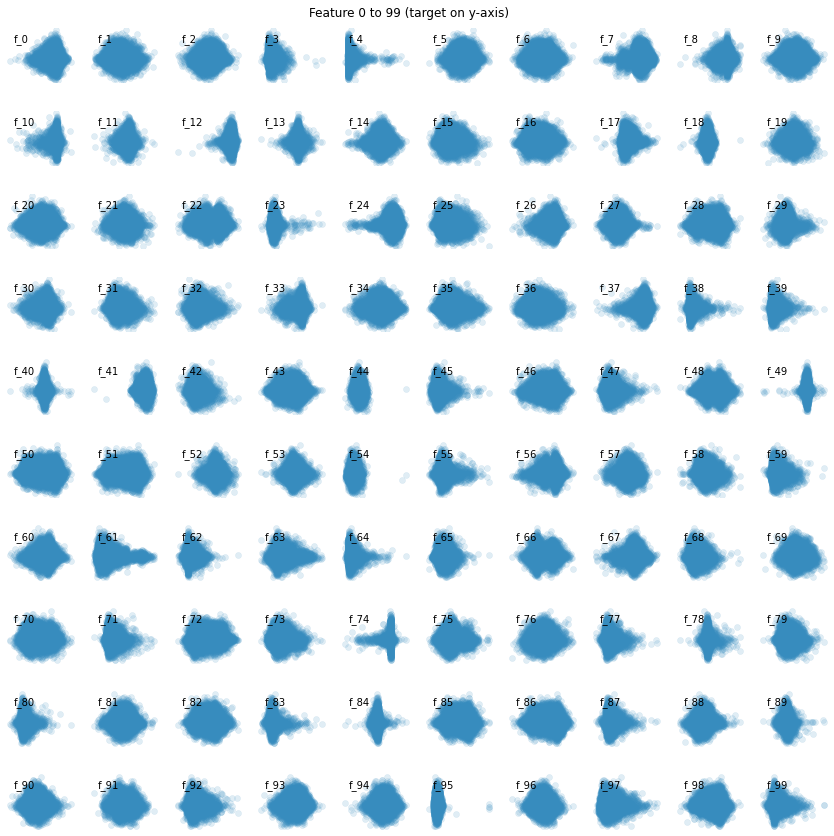

In [8]:
make_multi_scatters(train, 10, 10, (12, 12), start_count=0)

Four arguments are passed to the make_multi_scatters function:

DataFrame containing the Pandas DataFrame to be plotted.
A scatter plot with 10 rows will be displayed.
The number of columns of scatter plots to display is 10.
Twelve by twelve inches is the size of the overall plot figure (12, 12).
Start_count=0: the index of the subset of features to plot.
Calling make_multi_scatters() creates scatter plots arranged in a 10x10 grid for the first 100 features in the train DataFrame. Each scatter plot shows the relationship between each feature and the target variable, with the feature values on the x-axis and the target values on the y-axis.

In the scatter plots, the first 100 features in the train DataFrame will be displayed due to the start_count parameter being set to 0. A label will also appear in the top-left corner of each scatter plot indicating the name of the feature.

By using scatter plots, this code allows you to visualize a variety of features and the relationship between them in a Pandas DataFrame.

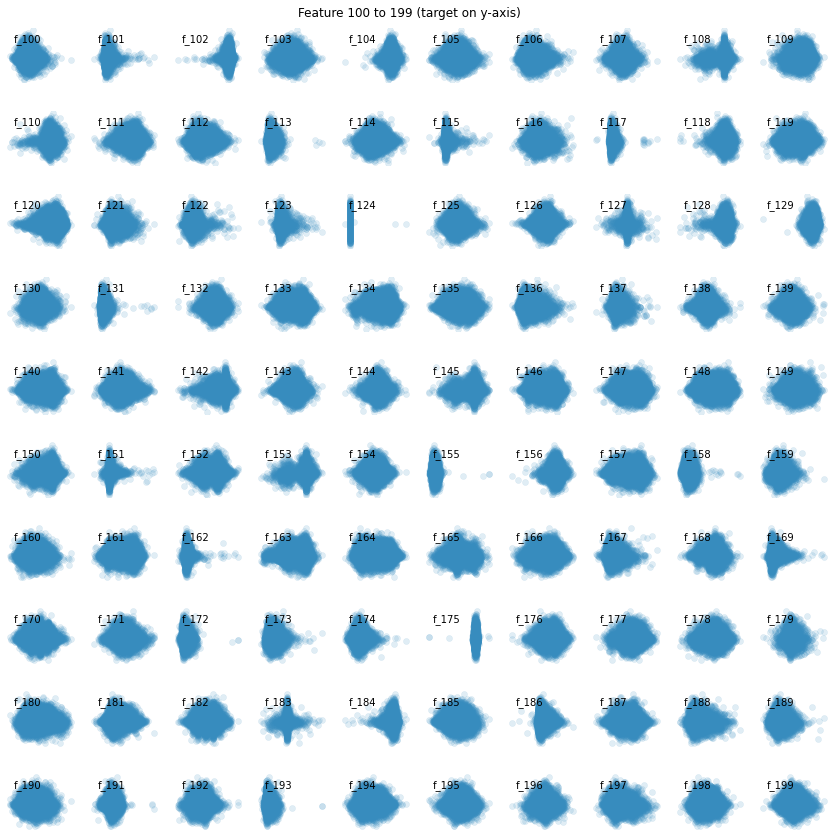

In [9]:
make_multi_scatters(train, 10, 10, (12, 12), start_count=100)

The following code calls the make_multi_scatters function with four arguments:

The Pandas DataFrame containing the data to be plotted.
The number of rows of scatter plots to display is 10.
The number of columns of scatter plots to display is 10.
(12, 12): A tuple specifying the overall plot figure size as 12 by 12 inches.
A subset of features will be plotted with start_count=100.
Make_multi_scatters() creates a set of scatter plots for the features in the train DataFrame starting at index 100, arranged in a 10x10 grid. Each scatter plot shows the relationship between each feature and the target variable, with the feature values on the x-axis and the target values on the y-axis.

The scatter plots will show the features starting at index 100 in the train DataFrame because the start_count parameter is set to 100. There will also be a label in the top-left corner of each scatter plot indicating the name of the feature.

By using scatter plots, this code simplifies the process of visualizing the relationship between a large number of features and a target variable in a Pandas DataFrame, while allowing the user to specify which subset of features to plot.

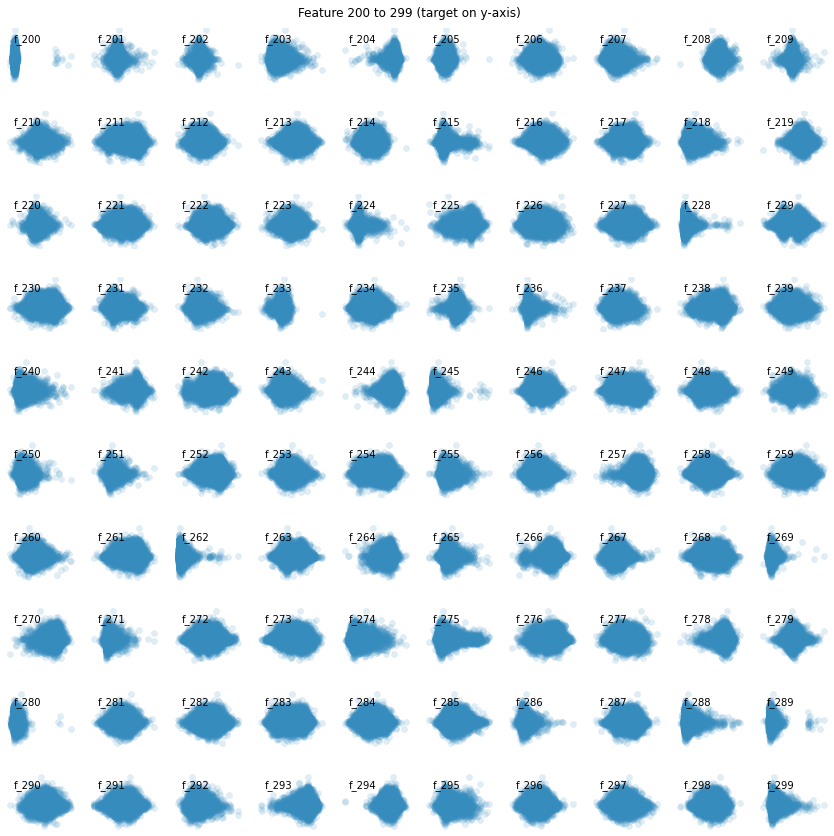

In [10]:
make_multi_scatters(train, 10, 10, (12, 12), start_count=200)

The following code calls the make_multi_scatters function, passing in four arguments:

Plotting data is contained in a Pandas DataFrame named train.
The number of rows of scatter plots to display is 10.
The number of columns of scatter plots to display is 10.
An overall plot figure size of 12 by 12 inches is specified by (12, 12).
A subset of features will be plotted with a start_count of 200.
By calling make_multi_scatters(), a set of scatter plots will be created for the train DataFrame features starting at index 200, arranged in a 10x10 grid. With the x-axis showing the feature values, and the y-axis showing the target values, scatter plots illustrate the relationship between the features and the target variables.

Scatter plots will show features starting at index 200 in the train DataFrame since the start_count parameter is set to 200. A label will also be displayed in the top-left corner of each scatter plot indicating the name of the feature.

This code visualizes the relationship between a large number of features and a target variable using scatter plots, with the ability to specify which subset of features to plot.

## Rewrite this when writing
# Thinking (and Trading) Fast and Slow

We've discused in the prior notebook, that the target is some kind of forward return for the `investment_id`. The features represent an "alpha" meant to be informative about the relative forward ranking of the target. We don't know what time horizon the target is for and we don't know anything about the individual alphas. One thing we can ascertain though, is the **turnover** of each alpha. In portfolio management, the turnover means the amount of trading that needs to be done for time *t* to rebalance the portfolio from *t-1* to the *t* target portfolio. We can imagine that an individual feature represents the target portolio for time *t*. If we look at the rank correlation between the feature on time *t* vs the feature on time *t-1* then we will have a proxy for the turnover of that feature. This can be very useful when we look at feature importance in a model later. Features can be fast or slow. A fast feature means it changes a lot from day-to-day. If the feature is defined by price and volume data for the recent history than it will likely change very quickly as time progresses because the data inputs change a lot. In comparison, if a feature is made from, for example, financial statement data (e.g., sales, asset information, etc.), then this feature will not change a lot from day to day since financial statement data is updated very infrequently (e.g., every 3 months in the United States). Let's get a flavor then of the turnover of the features.

How do we show visually if an alpha is fast or slow? We can do the following

- bin the alpha into deciles across stocks per day. We take each feature value and calculate what decile the feature value falls into *for that feature for that day*.
- we sort the dataframe once by the last day.
- we then plot this as a heatmap over time.

Is it better for an alpha to be fast or slow? It depends on the horizon of the target! Intuitively, imagine the target is the forward 6-month return. If your alpha whips around with dramatically different values every day, it is hard to rationalize that it could be predictive of 6-month returns. A slower alpha would likely be better in this case. 

Let's see two examples...

In [11]:
train.set_index(['time_id', 'investment_id'], inplace=True)

Using the columns 'time_id' and 'investment_id', this code creates a multi-level index on the Pandas DataFrame train.

On the train DataFrame, the set_index() method is called with the parameters ['time_id', 'investment_id'] and inplace=True. If the inplace=True parameter is provided, the original DataFrame train will be modified in place and the return value will be None.

A multilevel index reorganizes the DataFrame so that rows are grouped together based on the values in the columns 'time_id' and 'investment_id'. Many types of data analysis can benefit from this, especially when dealing with time-series data.

A DataFrame will be created with the 'time_id' and 'investment_id' columns as the first two columns, followed by any remaining columns. As a result of the multi-level index, any subsequent operations on the DataFrame can be grouped and aggregated at different levels.

In [12]:
all_columns = train.columns
features = all_columns[train.columns.str.contains('f_')]

First, the code retrieves all the column names from the Pandas DataFrame train and assigns them to all_columns.

The second line of code filters the all_columns array to only include column names containing the substring 'f_'. Using Pandas series' str.contains() method, we can determine which elements contain the given substring. By indexing the all_columns array with the Boolean array, only the column names that satisfy the condition will be returned. Afterward, the variable features are assigned the column names.

The code selects only columns containing the substring 'f_' in the train DataFrame, which typically indicates columns containing machine learning features. By subsetting the train DataFrame to include only the feature columns, and not other columns such as the target variable, the features variable becomes a one-dimensional array of column names.

In [13]:
def make_turnover_plot(df, feature, start_day=1100):
    div_map = sns.diverging_palette(220, 20, as_cmap=True)
    ax = (sns.heatmap(
        np.round(
            train[feature]
                 .unstack()
                 .T
                 .iloc[:, start_day:]
                 .rank(axis=0, pct=True)
                 .sort_values(1219)*10
            ,0),
        cmap='PuOr',
    ))
    ax.set(yticklabels=[]) 
    plt.title(f'{feature}: `investment_id` Binned by Feature Value vs Time')

Using this code, we create a heatmap plot of the turnover rate for a specified feature in the train DataFrame using the function make_turnover_plot.

There are three arguments to the function:

The Pandas DataFrame containing the data to be plotted.
The feature for which the turnover rate will be plotted.
The turnover rate calculation starts on the day specified by start_day.
With the help of the Seaborn library, the sns.heatmap() function is used to create a heatmap plot. DataFrame heatmaps display turnover rates for specified features.

Using the train[feature] DataFrame, the column values become the columns and the time_id values become the rows, to create the heatmap. A T attribute is then applied to the DataFrame in order to transpose it. Iloc[] selects a subset of the columns based on the start_day argument.

Next, the rank() method is used to calculate the rank of each column value within each row, expressed as a percentage. DataFrame 1219, the last time_id value in the dataset, is sorted by the column with the time_id 1219. A turnover rate for each feature value is determined by multiplying each rank value by 10 and rounding to the nearest integer.

The resulting DataFrame is then plotted as a heatmap using the sns.heatmap() function. By using the set() method, the yticklabels are hidden, and the heatmap is colored using the 'PuOr' colormap. Adding a title to the plot indicates the name of the feature and the binned investment_id values.

A Pandas DataFrame can be visualized using this function if a given feature's turnover rate is plotted against corresponding investment_id values.

### Rewrite
## A Slow Alpha

Feature 4 is a classic example of a **very slow** alpha. In fact, we can further see that this alpha is driven by **monthly data inputs** primarily. A month is ~20 business days. You can see that in the last 20 days, stocks barely changed deciles. In fact if you look at the 100-day period plotted, the stocks barely change bins. For a slow alpha, if you know the ranks for day *t*, you can guess closely what those ranks would be for *t-1*.

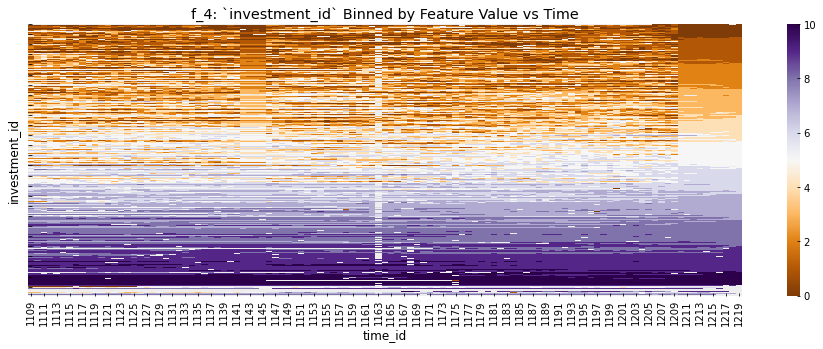

In [14]:
make_turnover_plot(train, 'f_4')

In this code, the make_turnover_plot function is called with two arguments:

The train DataFrame contains the data that will be plotted.
'f_4': the name of the feature for which turnover rates will be plotted.
Using these arguments, call make_turnover_plot() to create a heatmap plot of the turnover rate for feature f_4 in the train DataFrame. In order to calculate the turnover rate, each investment_id value is divided by the value of f_4 to obtain the percentage of times the value has changed ownership over time.

On the y-axis of the plot is the turnover rate of each investment_id value, binned by the value of f_4, and on the x-axis are the time_id values. Each square in the heatmap represents the turnover rate, with red representing a high turnover rate and blue representing a low turnover rate.

It is useful for identifying patterns and trends in the data because it visualizes the relationship between turnover rate and investment_id values in a Pandas DataFrame.

### rewrite this
## A Fast Alpha

Feature 9 is a **very fast** alpha. You can see that the bin membership for the `investment_id`s flips around dramatically every day. 

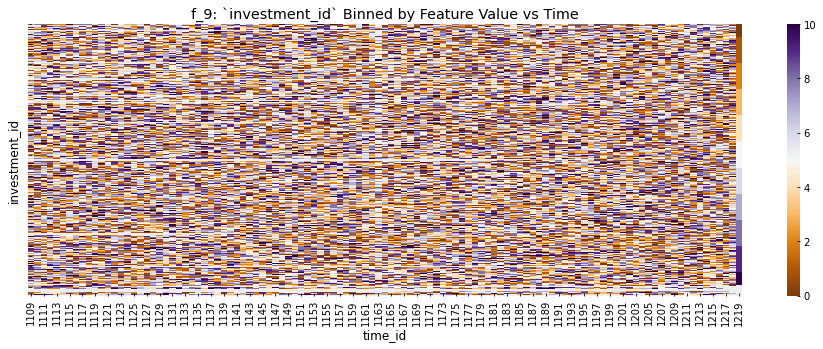

In [15]:
make_turnover_plot(train, 'f_9')

Two arguments are passed to the make_turnover_plot function in this code:

The Pandas DataFrame containing the data to be plotted.
The name of the feature for which the turnover rate will be plotted is 'f_9'.
With these arguments, make_turnover_plot() creates a heatmap plot of the turnover rate for feature f_9 in the train DataFrame. The turnover rate is calculated by dividing each investment_id value by the value of f_9 to find the percentage of times it changes ownership over time.

On the y-axis, the turnover rate of each investment_id value is shown, binned by f_9, and on the x-axis, the time_id values are shown. Red indicates a high turnover rate in the heatmap, while blue indicates a low turnover rate.

This plot provides a visual representation of the relationship between the turnover rate of a feature and the investment_id values in a Pandas DataFrame, and can be useful for identifying patterns and trends.

## The Target Speed

The target looks like it is very fast!

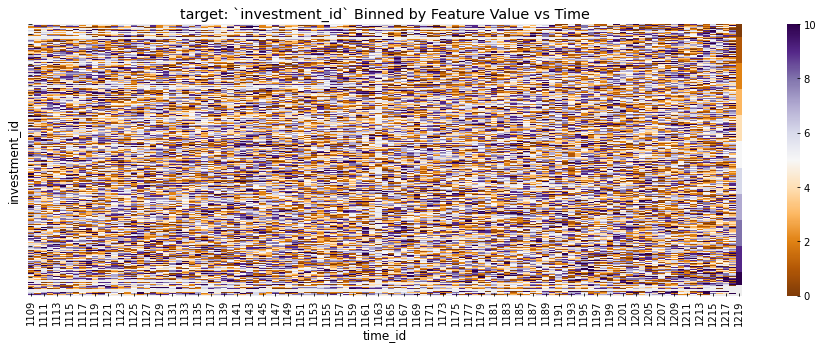

In [16]:
make_turnover_plot(train, 'target')

The following code calls the make_turnover_plot function, passing in two arguments:

Plotting data is contained in the Pandas DataFrame train.
A feature's turnover rate is plotted against its 'target' name.
With these arguments, make_turnover_plot() creates a heatmap plot of the turnover rate for the target variable in the train DataFrame. A turnover rate is calculated by dividing the number of times each investment_id changes ownership over time by the value of the target variable.

In the resulting plot, the turnover rates are plotted on the y-axis, binned by the value of the target variable, and the time_id values are plotted on the x-axis. Red indicates a high turnover rate, while blue indicates a low turnover rate in the heatmap.

Since the target variable is the variable that the machine learning model is attempting to predict, this plot might not be meaningful. Therefore, there is probably no meaningful relationship between it and investment_id. To explore relationships between features and investment_id values, the make_turnover_plot function is better suited.

### rewrite this too
## Measuring Alpha Speed: Rank Autocorrelation

We've seen it visually, but we want a measure we can apply across all features. The rank autocorrelation does this. For a given feature, we calculate the rank correlation for day *t* and day *t-1*. If the rank autocorrelation is **high** then the ranks don't change much and this is a **slow** alpha. If the rank autocorrelation is low then the ranks whip around a lot and this is a **fast** alpha.

In [17]:
def factor_rank_autocorrelation(feature_name='f_4',factor_data=train, period=1):
    """
    
    This function is a slightly modified version of the same from:
    https://github.com/stefan-jansen/alphalens-reloaded
    
    Computes autocorrelation of mean factor ranks in specified time spans.
    We must compare period to period factor ranks rather than factor values
    to account for systematic shifts in the factor values of all names or names
    within a group. This metric is useful for measuring the turnover of a
    factor. If the value of a factor for each name changes randomly from period
    to period, we'd expect an autocorrelation of 0.
    Parameters
    ----------
    factor_data : pd.DataFrame - MultiIndex
        A MultiIndex DataFrame indexed by date (level 0) and asset (level 1),
        containing the values for a single alpha factor, forward returns for
        each period, the factor quantile/bin that factor value belongs to, and
        (optionally) the group the asset belongs to.
        - See full explanation in utils.get_clean_factor_and_forward_returns
    period: int, optional
        Number of days over which to calculate the turnover.
    Returns
    -------
    autocorr : pd.Series
        Rolling 1 period (defined by time_rule) autocorrelation of
        factor values.
    """
    grouper = [factor_data.index.get_level_values('time_id')]

    ranks = factor_data.groupby(grouper)[feature_name].rank()

    asset_factor_rank = ranks.reset_index().pivot(index='time_id',
                                                  columns='investment_id',
                                                  values=feature_name)

    asset_shifted = asset_factor_rank.shift(period)

    autocorr = asset_factor_rank.corrwith(asset_shifted, axis=1)
    autocorr.name = period
    return autocorr


def rank_mean(feature):
    return factor_rank_autocorrelation(feature).mean()

Factor_rank_autocorrelation and rank_mean are defined in this code.

In the train DataFrame, the factor_rank_autocorrelation function computes the autocorrelation of mean factor ranks for a specified feature. There are three arguments to the function:

Feature_name: The name of the feature to be autocorrelated.
Factor_data: Pandas DataFrame containing the data for factor rank autocorrelation.
The number of days over which the factor rank autocorrelation is calculated.
Pandas DataFrame's rank() method is used to compute the ranks for each time_id and investment_id pair in the feature_name column. Pivoting the resulting DataFrame makes the time_id values the index and the investment_id values the columns.

A new DataFrame is created with the feature_name values shifted forward by the specified period number of days using the shift() method.

Using the corrwith() method, the pairwise correlation between the original feature_name DataFrame and the shifted DataFrame is calculated across the rows (axis 1). It is then returned the autocorr DataFrame.

By calling factor_rank_autocorrelation() with a specified feature argument, the rank_mean function calculates the mean factor rank autocorrelation for a given feature, and then computing the mean of the resulting DataFrame using mean().

As a result, these functions can provide insight into the turnover and stability of feature values over time by analyzing the autocorrelation of mean factor ranks over time.

In [18]:
def make_feature_rank_corr_plot(factor_data, feature_name, period=1):
    autocorr = factor_rank_autocorrelation(
        feature_name,
        factor_data, 
    )
    autocorr.plot(
        title=f'{feature_name}: Rolling 1-period Rank Autocorrelation',
        ylim=(-0.2, 1.05)
    );
    plt.axhline(autocorr.mean(), c='green', linestyle='--')
    plt.axhline(0)

With this code, you can create a plot of rolling 1-period rank autocorrelation for a specific feature in a train DataFrame using a function called make_feature_rank_corr_plot.

Three arguments are required:

To compute rank autocorrelation, we need to have a Pandas DataFrame with the data to use.
For which rank autocorrelation should be computed, feature_name must be specified.
Rank autocorrelation is calculated over a period of time.
Rank autocorrelation is computed for the specified feature_name over the specified period by calling the factor_rank_autocorrelation() function inside the function. With a title indicating the feature name and rolling rank autocorrelation, the autocorr DataFrame is plotted using the plot() method.

The axhline() function from Matplotlib is used to add two horizontal lines to the plot. In this figure, the dashed green line indicates the mean rank autocorrelation value, and the horizontal black line indicates a rank autocorrelation of zero.

A feature's rolling rank autocorrelation is useful for analyzing the predictability and stability of a feature over time.

We see for the **slow** alpha, the autocorrelation is very close to 1.0 always.

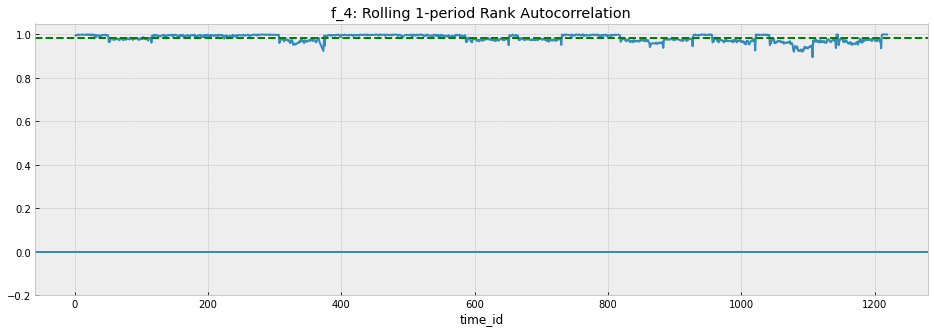

In [19]:
make_feature_rank_corr_plot(train, 'f_4')

The following code calls the make_feature_rank_corr_plot function, passing two arguments:

Rank autocorrelation will be computed using a Pandas DataFrame containing the input data.
For feature 'f_4', the rank autocorrelation is computed.
Making feature f_4 in the train DataFrame a rolling rank autocorrelation plot using these arguments is what make_feature_rank_corr_plot() does.

An x-axis shows time_id values, and a y-axis shows the rank autocorrelation of feature f_4. F_4's rolling 1-period rank autocorrelation over time is represented by the blue line. As shown in the figure, a horizontal black line indicates zero rank autocorrelation, while a dashed green line indicates the mean rank autocorrelation.

Based on the rolling rank autocorrelation, we can see that feature f_4 has demonstrated stability and predictability over time.

For the fast alpha, we see that the rolling autocorrelation is lower.

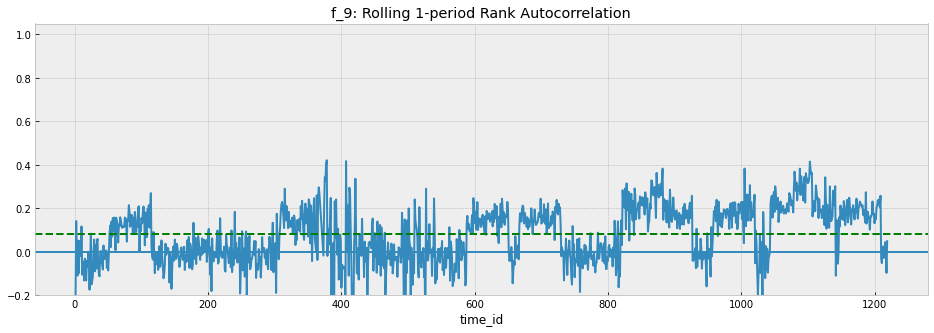

In [20]:
make_feature_rank_corr_plot(train, 'f_9')

Two arguments are passed into the make_feature_rank_corr_plot function:

The Pandas DataFrame containing the data to be used to compute the rank autocorrelation.
The feature name for which rank autocorrelation should be computed is 'f_9'.
In the train DataFrame, call make_feature_rank_corr_plot() to plot the rolling 1-period rank autocorrelation of feature f_9.

As a result, the y-axis shows the rank autocorrelation for feature f_9, and the x-axis shows the time_id values. F_9's rank autocorrelation over time can be seen in the blue line. A horizontal black line indicates a rank autocorrelation of 0, while a green dashed line indicates the mean rank autocorrelation.

In general, the rolling rank autocorrelation plot can provide insight into feature f_9's stability and predictiveness over time.

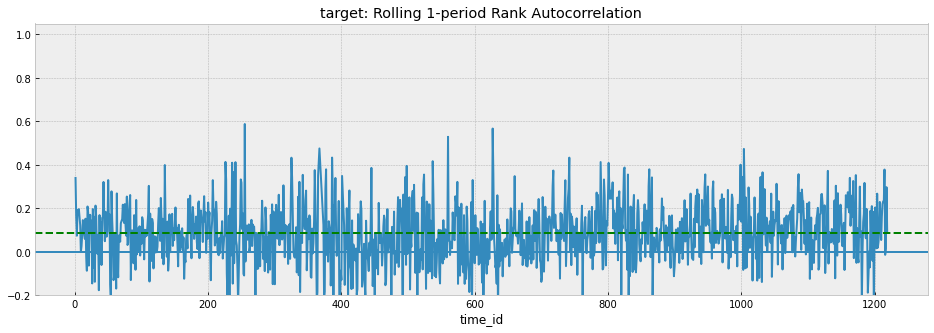

In [21]:
make_feature_rank_corr_plot(train, 'target')

The following code calls the make_feature_rank_corr_plot function, passing two arguments:

DataFrame containing the rank autocorrelation data in Pandas.
'target': the feature for which rank autocorrelation is computed.
Machine learning models, however, attempt to predict a variable, not a feature, in the target column. Thus, calling make_feature_rank_corr_plot() with 'target' as the feature name may not be useful for understanding the stability and predictive power of the target variable over time.

Let's get the mean rank correlation for **all** features. We can use this later along with feature importance to tell us about the nature of this competition.

In [22]:
%%time

p = multiprocessing.Pool(N_CPU - 1)

feature_rank_corr_dict = dict(
    zip(features,
        p.map(rank_mean, features))
)

CPU times: user 634 ms, sys: 249 ms, total: 882 ms
Wall time: 9min 10s


Using the multiprocessing module, this code block calculates the mean rank autocorrelation for each feature in the train DataFrame.

Pool objects are created with N_CPU - 1 as the number of processes. Parallelizing the computation will be possible by creating a pool of worker processes.

The ranking_mean() function is then applied to each feature and a dictionary is created with its values and the features list as keys. Pool uses the map() method to apply the rank_mean() function in parallel to each feature. By mapping each feature to its mean rank autocorrelation, feature_rank_corr_dict is created.

This code block is timed using %time magic command.

In [23]:
fra = pd.DataFrame(
    index=feature_rank_corr_dict.keys(),
    data=feature_rank_corr_dict.values(),
    columns=['fra']
)

fra.to_csv('fra.csv')

A Pandas DataFrame called fra is created with two columns: index and fra. The index column contains the keys of feature_rank_corr_dict dictionary (i.e., the names of features in the train DataFrame), and the fra column contains the values of feature_rank_corr_dict dictionary (i.e., the mean rank autocorrelation for each feature).

CSV file fra.csv is created from the resulting DataFrame. Data from the feature rank autocorrelation can be stored and shared in this file, or read back into a Python program at a later date.

In [24]:
fra.describe().T

count     mean       std       min       25%       50%       75%      max
fra  300.0  0.71326  0.272654  0.051514  0.589028  0.817693  0.925092  0.99776

For each feature in the train DataFrame, this code computes descriptive statistics for the fra DataFrame.

The .describe() method is used to compute the following summary statistics for the fra DataFrame:

Non-missing values for each column are counted
The mean of each column
std: the standard deviation of each column
min: the minimum value of each column
25%: the 25th percentile of each column
50%: the median (50th percentile) of each column
75%: the 75th percentile of each column
max: the maximum value of each column
By using the .T attribute, you can transpose the resulting DataFrame, allowing you to read it easier.

Using these statistics, one can gain a better understanding of the distribution of the mean rank autocorrelation values within the train DataFrame.

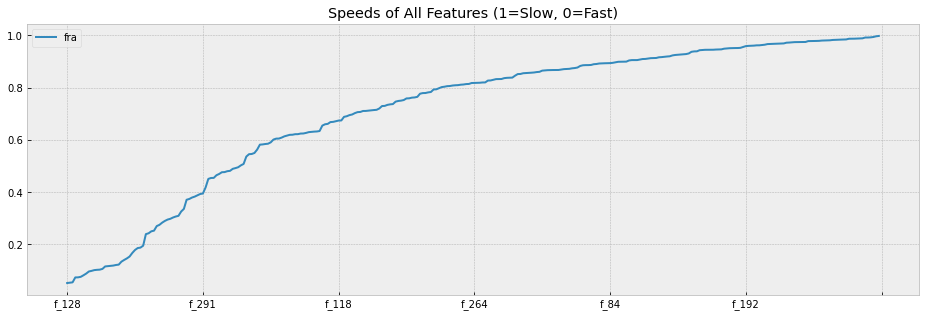

In [25]:
fra.sort_values(by='fra').plot(title='Speeds of All Features (1=Slow, 0=Fast)');

An autocorrelation plot is created for each feature in the train DataFrame using this code. The fra DataFrame is sorted in ascending order by the fra column (i.e., slow features appear at the top, while fast features appear at the bottom).

After sorting the DataFrame, the .plot() method is called to create a line plot with the mean rank autocorrelation values on the y-axis and the feature names on the x-axis. There is a title on the plot indicating that 1 represents slow features, whereas 0 represents fast features.

It is possible to use this plot to determine which features in the train DataFrame have the highest and lowest mean rank autocorrelation values, an indication of their stability and predictiveness.

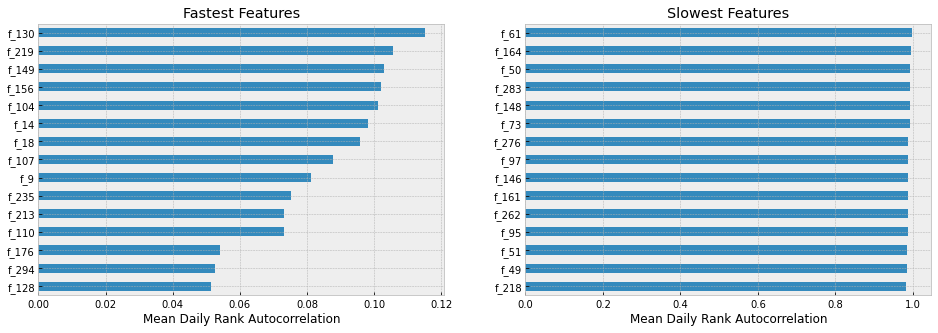

In [26]:
fig, ax = plt.subplots(1, 2)

(fra.sort_values(by='fra')[:15]
 .plot(kind='barh',
       title='Fastest Features',
       legend=False,
       ax=ax[0]))

ax[0].set_xlabel("Mean Daily Rank Autocorrelation")

(fra.sort_values(by='fra')[-15:]
 .plot(kind='barh',
       title='Slowest Features',
       legend=False,
       ax=ax[1]))

ax[1].set_xlabel("Mean Daily Rank Autocorrelation");

This code creates a figure with two horizontal bar charts, each showing the mean rank autocorrelation values for the 15 fastest and slowest features in the train DataFrame.

The subplots() function is used to create an object fig and two axes (ax).

Next, .sort_values(by='fra')[:15] is used to select the fastest 15 features from the fra DataFrame, and the .plot() method is used to create a horizontal bar chart for these features:

kind='barh': create a horizontal bar chart
title='Fastest Features': set the title of the chart to "Fastest Features"
legend=False: don't show the legend on the chart
ax=ax[0]: plot the chart on the first axis object
Ax[0].set_xlabel() is used to set the x-axis label of the first chart to "Mean Daily Rank Autocorrelation".

To plot the chart on the second axis object, .sort_values(by='fra')[-15:] is used to select the slowest 15 features in the fra DataFrame. The x-axis label of the second chart is also set to "Mean Daily Rank Autocorrelation" using ax[1].set_xlabel().

It is possible to use these charts to identify which features are more or less predictable over time, and how their mean rank autocorrelation values compare to each other.

### rewrite this
# Target Prediction Correlation

From the competition Overview -> Evaluation tab
> Submissions are evaluated on the mean of the Pearson correlation coefficient for each time ID.

To evaluate the features you need to calculated the per `time_id` correlation with the target and then take the mean over all periods. In quantitative finance, this is called the **mean information coefficient**, or just **mean IC**.


In [27]:
def target_correlation(feature_name='f_4', factor_data=train):

    grouper = [factor_data.index.get_level_values('time_id')]

    ranks = factor_data.groupby(grouper)[feature_name].rank()

    asset_factor_rank = ranks.reset_index().pivot(
        index='time_id',
        columns='investment_id',
        values=feature_name
    )

    target_ = factor_data['target'].unstack()

    corr = asset_factor_rank.corrwith(target_, axis=1)
    corr.name = 'corr'
    return corr

def ic_mean(feature):
    return target_correlation(feature).mean()


There are two functions here:

This function computes the correlation between the values of a given feature and the target variable (target). First, the function groups the train DataFrame by time_id, calculates the rank of each investment in the feature, and pivots the result into a matrix with investments on the columns and time on the rows. A matrix with the same shape as the feature matrix is created using the target column of the original train DataFrame. As a result, it generates a Pandas Series of correlation values indexed by time_id for the two matrices over time.
A target correlation value is computed by using the ic_mean function. It returns the mean value of the Pandas Series resulting from applying the target_correlation function to the specified feature.
The purpose of these functions is to help determine which features are more or less predictive of a target variable over time, and how each feature correlates with it over time.

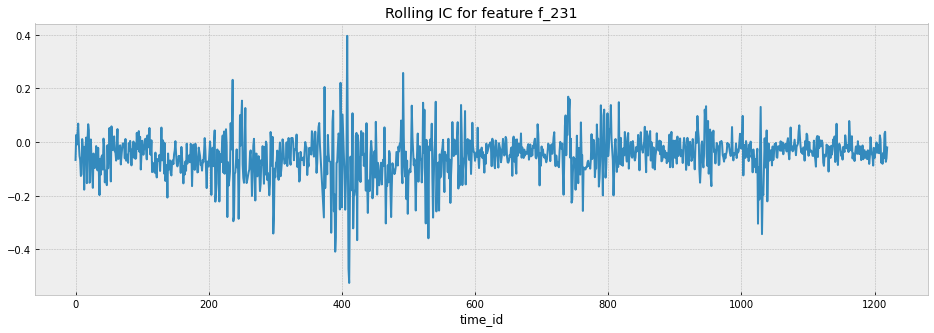

In [28]:
target_correlation('f_231').plot(title='Rolling IC for feature f_231');

A line plot of the rolling correlation between feature f_231 and the target variable (target) over time is created by this code.

Using feature_name='f_231', the target_correlation function computes the correlation between f_231 and the target variable. In order to plot the Pandas Series, the following arguments are passed to the .plot() method:

Plot title = "Rolling IC for feature f_231": set the plot title to "Rolling IC for feature f_231.
By plotting the correlation between f_231 and the target variable over time, we can identify patterns or trends in the relationship between them.

In [29]:
%%time

p = multiprocessing.Pool(N_CPU - 1)

target_corr_dict = dict(
    zip(features,
        p.map(ic_mean, features))
)

CPU times: user 1.46 s, sys: 499 ms, total: 1.96 s
Wall time: 12min 31s


Multiprocessing.Pool() is used to compute the mean target correlation for each feature in the train DataFrame.

In the first step, a Pool object is created with N_CPU - 1 processes, where N_CPU is the number of CPU cores available. By mapping the ic_mean() function to each feature in the features list, p.map() computes the mean target correlation value for each feature simultaneously.

This dictionary of target correlation values is stored in target_corr_dict, where the keys are the feature names and the values are the mean target correlation values.

When working with large datasets, parallel processing can speed up the computation of target correlations for a large number of features.

In [30]:
corr = pd.DataFrame(
    index=target_corr_dict.keys(),
    data=target_corr_dict.values(),
    columns=['corr']
)

corr['corr_abs'] = corr['corr'].abs()
corr.to_csv('corr.csv')


In this code, the mean target correlation values for each feature are stored in a Pandas DataFrame corr.

The following arguments are used to create the corr DataFrame:

The target_corr_dict contains the feature names of the DataFrame: index=target_corr_dict.keys()
The DataFrame will be filled with the mean correlation values from the target_corr_dict using data=target_corr_dict.values()
Columns=['corr']: rename the column to "corr"
A new column corr_abs is added to the corr DataFrame after it is created, which contains the absolute values of the mean target correlation values. A CSV file named "corr.csv" is then created from the DataFrame using the .to_csv() method.

For further analysis or modeling, you can use this code to store the target correlation values for each feature.

In [31]:
corr.describe().T

count      mean       std       min       25%       50%       75%  \
corr      300.0 -0.009361  0.019822 -0.050429 -0.023978 -0.011974  0.003512   
corr_abs  300.0  0.018709  0.011386  0.000014  0.009677  0.018527  0.026761   

               max  
corr      0.041043  
corr_abs  0.050429

Summary statistics of the corr DataFrame are computed and printed in this code.

On the DataFrame, the .describe() method calculates the following statistics:

count: the number of non-null values in the column
mean: the mean value of the column
std: the standard deviation of the column
min: the minimum value of the column
25%: the 25th percentile value of the column
50%: the median value of the column (i.e., the 50th percentile)
75%: the 75th percentile value of the column
max: the maximum value of the column
Summary statistics are displayed using the .T attribute, which transposes the DataFrame to make it easier to read.

In general, these statistics can be useful for identifying which features are more or less predictive of the target based on how target correlation values are distributed across the train DataFrame's features.

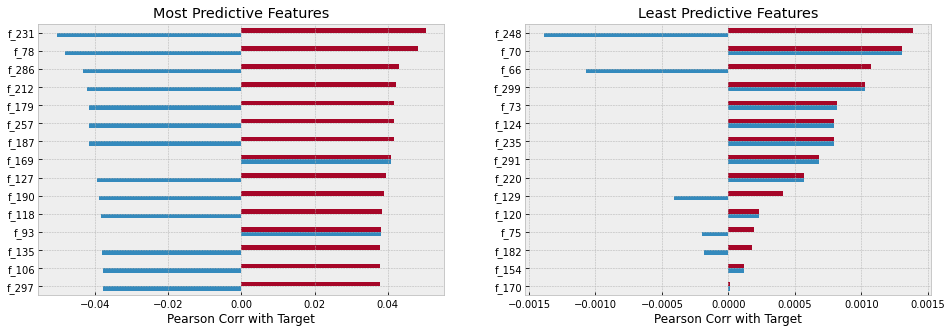

In [32]:
fig, ax = plt.subplots(1, 2)
corr.sort_values(by='corr_abs')[-15:].plot(kind='barh', title='Most Predictive Features', legend=False, ax=ax[0])
ax[0].set_xlabel("Pearson Corr with Target")

corr.sort_values(by='corr_abs')[:15].plot(kind='barh', title='Least Predictive Features', legend=False, ax=ax[1])
ax[1].set_xlabel("Pearson Corr with Target");

Based on their absolute Pearson correlation with the target variable (target), this code creates a horizontal bar chart with subplots to show the top 15 most and least predictive features.

Using the .sort_values() method, we sort the corr DataFrame by the absolute value of the correlation, and then select the top and bottom 15 features to plot.

Subplots() is used to create a two-panel figure with one row and two columns. By using the .plot() method with the following arguments, the top 15 most predictive features are plotted on the left panel:

kind='barh': create a horizontal bar chart
title='Most Predictive Features': set the title of the plot to "Most Predictive Features"
legend=False: hide the legend
ax=ax[0]: plot the chart on the left panel of the figure
xlabel="Pearson Corr with Target": set the x-axis label to "Pearson Corr with Target"
Using the same syntax and different titles and labels, the bottom 15 least predictive features are plotted on the right panel.

The correlation chart can be useful for identifying potential candidate features for modeling and for visualizing which features have the strongest and weakest correlation with the target variable.

# Feature Rank Autocorrelation vs. Target Correlation

Text(0.5, 1.0, 'Feature Speed vs Feature:Target Corr')

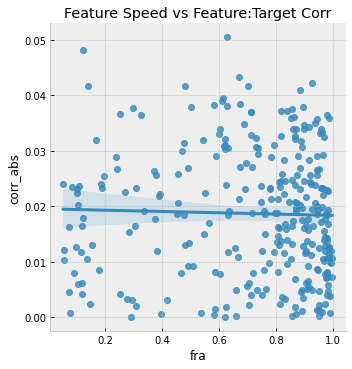

In [33]:
sns.lmplot(x='fra',y='corr_abs',data=corr.join(fra).sort_values('corr_abs'), fit_reg=True)
plt.title('Feature Speed vs Feature:Target Corr')

Using Seaborn's lmplot() function, this code creates a scatter plot to visualize the relationship between feature speed (measured by mean daily rank autocorrelation) and feature-target correlation.

The feature speed information is added to the DataFrame by first joining the corr DataFrame with the fra DataFrame using the .join() method. With the .sort_values() method, we sort the DataFrame by the correlation's absolute value.

After this, the lmplot() function is called with the following arguments:

x='fra': set the x-axis to "fra" (feature speed)
y='corr_abs': set the y-axis to "corr_abs" (absolute value of feature-target correlation)
data=corr.join(fra).sort_values('corr_abs'): use the joined and sorted DataFrame as the data source
fit_reg=True: fit a linear regression line to the data
plt.title('Feature Speed vs Feature:Target Corr'): set the title of the plot to "Feature Speed vs Feature:Target Corr"
This plot can be used to understand the relationship between feature speed and feature-target correlation, and to identify potential modeling features.

In [34]:
corr.join(fra).sort_values('corr_abs', ascending=False)

corr  corr_abs       fra
f_231 -0.050429  0.050429  0.629387
f_78  -0.048205  0.048205  0.120695
f_286 -0.043208  0.043208  0.668741
f_212 -0.042285  0.042285  0.925686
f_179 -0.041705  0.041705  0.139932
...         ...       ...       ...
f_120  0.000232  0.000232  0.949884
f_75  -0.000196  0.000196  0.856996
f_182 -0.000180  0.000180  0.659471
f_154  0.000118  0.000118  0.289411
f_170  0.000014  0.000014  0.619471

[300 rows x 3 columns]

This code sorts the corr DataFrame in descending order by the absolute correlation value (corr_abs) and then joins it with the fra DataFrame to include the mean daily rank autocorrelation values (fra) for each feature.

With .join(), the two DataFrames are combined based on their index, and the resulting DataFrame is sorted by the absolute value of correlation using .sort_values() with the ascending=False argument, which sorts the DataFrame descending.

As a result, this code is useful for identifying which features are most highly correlated with the target variable and evaluating their predictive power.

This is surprising to me... it doesn't appear that alpha turnover is correlated to the abilty of the alpha to predict the target. From a financial perspective, it is surprising because it means that an almost static portfolio allocation can still outperform. From a machine learning perspective, it is suprising beacuse it means that "dropping low variance features" is not a sensible feature selection strategy. 

# Engineering "Speed" Features

I had to create a new notebook for utilizing the speed features in modeling due to out-of-memory issues. Please see ["Stacking & Feature Importance"](https://www.kaggle.com/marketneutral/stacking-feature-importance) to see an example of how the speed information can be used. The speed features are both important and stable.


Thank you for taking a look at this notebook. Please leave comments and suggestions.